# Volume 3: Pandas 2
    Matthew Schaelling
    Math 403
    October 26, 2017

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data
plt.style.use('seaborn')

%matplotlib inline

## Problem 1

Visualize 5 data sets with 2 or 3 figures each.

## Road Dataset

In [19]:
#data('road', show_doc=True)
road = data('road')

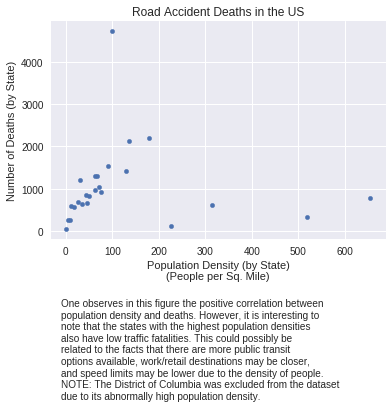

In [59]:
road[road.index != 'DC'].plot(x = 'popden', y = 'deaths', kind='scatter')
plt.xlabel("Population Density (by State)\n(People per Sq. Mile)")
plt.ylabel("Number of Deaths (by State)")
plt.text(-10,-4000, "One observes in this figure the positive correlation between \npopulation density and deaths. However, it is interesting to \nnote that the states with the highest population densities \nalso have low traffic fatalities. This could possibly be \nrelated to the facts that there are more public transit \noptions available, work/retail destinations may be closer, \nand speed limits may be lower due to the density of people.\nNOTE: The District of Columbia was excluded from the dataset \ndue to its abnormally high population density.")
plt.title("Road Accident Deaths in the US")
plt.show()

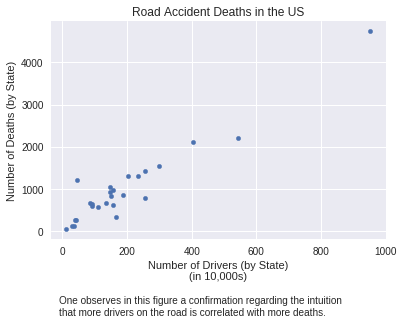

In [60]:
road.plot(x='drivers', y='deaths', kind='scatter', title="Road Accident Deaths in the US")
plt.xlabel("Number of Drivers (by State)\n(in 10,000s)")
plt.ylabel("Number of Deaths (by State)")
plt.text(-10,-2000, "One observes in this figure a confirmation regarding the intuition \nthat more drivers on the road is correlated with more deaths.")
plt.show()

In [61]:
road.corr('spearman')

,deaths,drivers,popden,rural,temp,fuel
deaths,1.000000,0.830427,0.269060,0.609885,0.190232,0.814156
drivers,0.830427,1.000000,0.494701,0.546263,0.130592,0.926996
popden,0.269060,0.494701,1.000000,-0.210364,0.196059,0.446914
rural,0.609885,0.546263,-0.210364,1.000000,-0.087106,0.525488
temp,0.190232,0.130592,0.196059,-0.087106,1.000000,0.071478
fuel,0.814156,0.926996,0.446914,0.525488,0.071478,1.000000


Above is a Spearman correlation matrix for your enjoyment and exploration. The Spearman measure of correlation eliminates the assumtion that the relationship must be linear, allowing for more general realtionships. Pretty sexy, eh?

## Arbuthnot Dataset

In [45]:
#data('Arbuthnot', show_doc=True)
arbuthnot = data('Arbuthnot')
arbuthnot.set_index('Year', inplace=True)

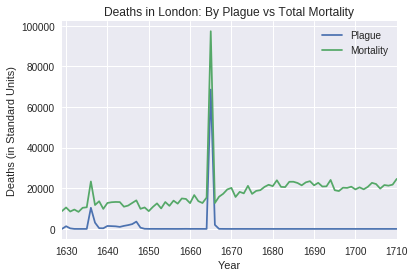

In [62]:
arbuthnot.plot(y=["Plague", "Mortality"])
plt.title("Deaths in London: By Plague vs Total Mortality")
plt.ylabel("Deaths (in Standard Units)")
plt.show()

Above, we see that when plagues came through London they drove much of the deaths in the city. However, there seems to be a lot of noise in the total mortality rate over time.

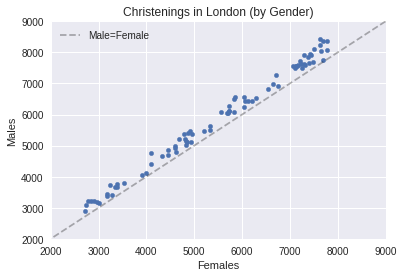

In [82]:
arbuthnot.plot(kind='scatter', x='Females', y='Males')
plt.title("Christenings in London (by Gender)")
plt.xlim(2000,9000)
plt.ylim(2000,9000)
plt.plot(np.linspace(0,9000), np.linspace(0,9000), 'k--', alpha=.3, label='Male=Female')
plt.legend()
plt.show()

Above we observe the same relationship originally found by John Arbuthnot, that male Christenings were (unusually) higher than female Christenings. He used this to draw the conclusion that divine providence was at work.

## Birth Weight Dataset

In [123]:
# data('birthwt', show_doc=True)
birthwt = data('birthwt')

In [124]:
# birthwt.describe()

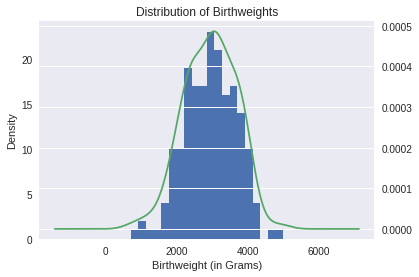

In [75]:
ax = birthwt.bwt.plot(kind='hist', grid=False, bins=20)
plt.xlabel("Birthweight (in Grams)")
birthwt.bwt.plot(kind='kde', ax=ax, secondary_y=True)
plt.title('Distribution of Birthweights')
plt.show()

Above, we observe a histogram with the associated kernel density estimate for birthweights. On the left y-axis, we see frequency, and the right y-axis displays the values associated with the KDE. The distribution appears to be normally distributed.

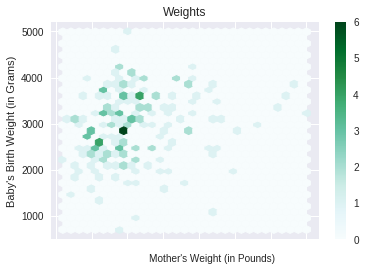

In [112]:
ax = birthwt.plot(x='lwt',y='bwt', kind='Hexbin', gridsize=30)
ax.set_ylabel("Baby's Birth Weight (in Grams)")
plt.title("Weights")
plt.text(140, 10, "Mother's Weight (in Pounds)")
plt.show()

Here we see that almost all mothers and children have positive weight, which is a relief. Additionally, there seems to be a positive correlation.

## Birth Rate and Death Rate Dataset

In [125]:
# data('birthdeathrates', show_doc=True)
# BDR stands for Birth Death Rates
bdr = data('birthdeathrates') 

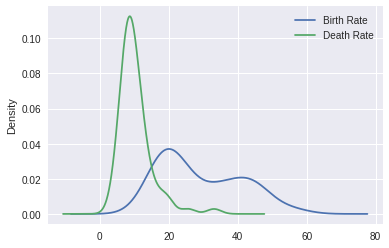

In [121]:
ax = bdr.birth.plot(kind='kde', label='Birth Rate')
# plt.xlabel("Birthweight (in Grams)")
bdr.death.plot(kind='kde', ax=ax, secondary_y=False, label='Death Rate')
plt.legend()
plt.title('Distributions of Birth and Death Rates')
plt.show()

We see that the death rate variance is much smaller than the birth rate variance. Additionally, the birth rate seems to be bimodal to some degree. 

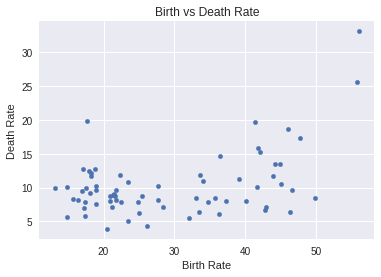

In [136]:
bdr.plot(x='birth', y='death', kind='scatter')
plt.title("Birth vs Death Rate")
plt.xlabel("Birth Rate")
plt.ylabel("Death Rate")
plt.show()

Above is a scatter plot of birth and death rates. We see the variance of birth rate and death rate increase with higher birth rate. This could be related to the fact that poorer nations typically have higher birth rates and many countries with conflict and disease are also impoverished.

## Trees Dataset

In [149]:
# data('trees', show_doc=True)
trees = data('trees')

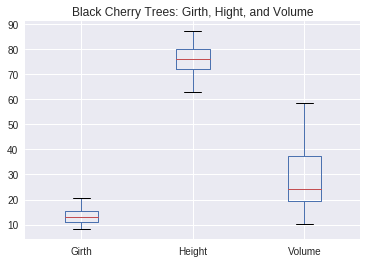

In [146]:
trees.plot(kind='box')
plt.title("Black Cherry Trees: Girth, Hight, and Volume")
plt.show()

We observe that volume has a much higher variance than height or girth.

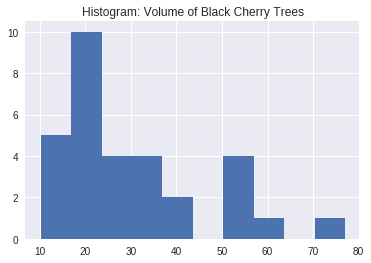

In [150]:
trees.Volume.hist(bins=10)
plt.title("Histogram: Volume of Black Cherry Trees")
plt.show()

Here we see the actual frequency of volumes. It appears that the wide variance of volume is partially due to some outliers.